In [1]:
reset -fs

In [2]:
# this only need to be run once
%load_ext rpy2.ipython

In [3]:
import pandas as pd
import numpy as np
import os
import glob

In [4]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [703]:
# import datasets
path = r'data' # use your path
all_files = glob.glob(path + "/*36.csv")

In [704]:
# 2019 is different format, handle separately
filename = 'data/fars_2009_31.csv'
df9 = pd.read_csv(filename, index_col=None, header=0, dtype={'malcohol': int, "icity": str, "istatenum": int, "pnumber": int, "atmcond": int, "saccdate": str})
df9.rename(columns = {'istatenum':'statenum', "icasenum": "casenum", 'icity':'city', 'saccdate': 'accdate'}, inplace = True)
df9 = df9[['statenum','casenum', 'city', 'accdate', 'malcohol', 'dayofweek','longitude','latitude']]
#df['malcohol'].replace('.', '0')
#df9['malcohol'] = df9['malcohol'].astype(int)

In [705]:
pd.read_csv('fars_2017_36.csv').columns

/Users/linmeng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['statenum', 'casenum', 'vnumber', 'pnumber', 'atmcond', 'city',
       'county', 'accdate', 'acctime', 'dayofweek', 'driverdrowsy', 'holiday',
       'latdeg', 'lightcond', 'londeg', 'manncol', 'numfatal', 'speeding',
       'age', 'alcres', 'drugres1', 'injury', 'ptype', 'seatpos', 'sex',
       'hitrun', 'dricondatcrashtime', 'malcohol', 'prevdwi', 'prevacc',
       'prevspd', 'crashtype', 'criticalevent', 'dridistract', 'driavoidmanvr',
       'drivisobs'],
      dtype='object')

In [707]:
# 2010 - 2017 'malcohol': int,
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, dtype={ 'malcohol': int,"city": str,"pnumber": int, "atmcond": int, "accdate": str})
    df = df[['statenum','casenum', 'city', 'accdate', 'malcohol', 'dayofweek']]
    li.append(df)

li.append(df9)
frame = pd.concat(li, axis=0, ignore_index=True, sort = False)

In [45]:
#2005 bc it's different 
Five=pd.read_csv('2005.csv')
Five=Five.fillna(0)
Five.rename(columns = {'istatenum':'statenum', "icasenum": "casenum", 'icity':'city', 'saccdate': 'accdate','ialcinvol':'malcohol'}, inplace = True)
Five_c=Five[['statenum','casenum', 'city', 'accdate', 'malcohol', 'dayofweek']]

In [27]:
#import 2006 dataset 
six=pd.read_csv('2006.csv')
six=six.fillna(0)
six.rename(columns = {'istatenum':'statenum', "icasenum": "casenum", 'icity':'city', 'saccdate': 'accdate','ialcinvol':'malcohol'}, inplace = True)
six_c=six[['statenum','casenum', 'city', 'accdate', 'malcohol', 'dayofweek']]

In [28]:
#2007
sev=pd.read_csv('2007.csv')
sev=sev.fillna(0)
sev.rename(columns = {'istatenum':'statenum', "icasenum": "casenum", 'icity':'city', 'saccdate': 'accdate','ialcinvol':'malcohol'}, inplace = True)
sev_c=sev[['statenum','casenum', 'city', 'accdate', 'malcohol', 'dayofweek']]

In [29]:
#2008
eight=pd.read_csv('2008.csv')
eight=eight.fillna(0)
eight.rename(columns = {'istatenum':'statenum', "icasenum": "casenum", 'icity':'city', 'saccdate': 'accdate','ialcinvol':'malcohol'}, inplace = True)
eight_c=eight[['statenum','casenum', 'city', 'accdate', 'malcohol', 'dayofweek']]

In [30]:
later_half=Five_c.append(six_c).append(sev_c).append(eight_c) #append all the years together
frame=frame.append(later_half)

In [709]:
frame['year'] = frame['accdate'].str[-4:]       # clean the accdate to get the year variable
frame['accdate']=frame['accdate'].apply(lambda date: str(date).zfill(8))
frame['month']=frame['accdate'].str[:2]
frame['month']=frame['month'].apply(lambda x:int(x))

In [711]:
frame.shape   #inspect the shape of out data

(648029, 10)

# San Francisco dataset 

In [317]:
SF=frame.loc[(frame.statenum == 6.0)& (frame.city == '3290')&(frame.malcohol != 1)]
sf_c=SF.groupby('year').agg({'casenum':'count'}).reset_index()

# Los Angeles dataset

In [712]:
la = frame.loc[(frame.statenum == 6.0) & (frame.city == '1980')  & (frame.malcohol != 1)]
la = la.groupby('year').agg({'casenum':'count'}).reset_index()

# SAN JOSE dataset

In [713]:
sj = frame.loc[(frame.statenum == 6) & (frame.city == '3340')  & (frame.malcohol != 1)]
sj = sj.groupby('year').agg({'casenum':'count'}).reset_index()

# create city variable for the datasets 

In [714]:
la['city']='LA'
sj['city']='San Jose'
sf_c['city']='San Francisco'

# generate a complete dataset with SF, LA,SJ for facet_grid

In [360]:
summ=la.append(sj).append(sf_c)
summ['c']=0 #set color variable as 0
summ.loc[(summ.city=='LA')&(summ.year>='2012'),'c']=1
summ.loc[(summ.city=='San Francisco')&(summ.year>='2010'),'c']=1
summ.loc[(summ.city=='San Jose')&(summ.year>='2010'),'c']=1
summ.c=summ.c.astype(str)    #generate a color variable to identify trend before and after TNC is introduced 

In [643]:
summ_a=summ.loc[summ.c=='1']

In [644]:
%R -i summ -i summ_a

data set for geom_text, TNC introduce date

In [422]:
data=[['San Francisco',6,8],['LA',8,9],['San Jose',6,8]]
data=pd.DataFrame(data)
data.columns=['city','year','lyft']
data

,city,year,lyft
0,San Francisco,6,8
1,LA,8,9
2,San Jose,6,8


data set for geom_text city label

In [474]:
text=[['LA',800],['San Francisco',150],['San Jose',150]]
text=pd.DataFrame(text)
text.columns=['city','y']
text

,city,y
0,LA,800
1,San Francisco,150
2,San Jose,150


text label for percentage increase 

In [692]:
per_text=[['LA',8,560,'+10.9%'],['San Francisco',6,75,'+6%'],['San Jose',6,120,'+15.5%']]
per_text=pd.DataFrame(per_text)
per_text.columns=['city','x','y','label']
per_text

,city,x,y,label
0,LA,8,560,+10.9%
1,San Francisco,6,75,+6%
2,San Jose,6,120,+15.5%


text label data set for color

In [620]:
color=[['LA',8,380,410],['San Francisco',6,53,57],['San Jose',6,52,56]]
color=pd.DataFrame(color)
color.columns=['city','x','y','ymax']
color

,city,x,y,ymax
0,LA,8,380,500
1,San Francisco,6,53,57
2,San Jose,6,52,57


In [715]:
summ=summ[summ.year!='2017'] # we are only inspectin 2005-2016 

# calculate the percentage increase for different cities 

In [683]:
p=summ.groupby(['city','year']).agg({'casenum':'sum'}).reset_index()
p['per']=p.sort_values(['year']).groupby('city')[['casenum']].pct_change()
p.groupby('city').agg({'per':'mean'})
(0.084433+0.041363-0.128505+0.436997)/4
(0.057692-0.290909-0.025641+0.315789+0.200000+0.1)/6
(0.156863+0.440678-0.141176+0.178082+0.511628-0.215385)/6

0.155115

In [569]:
%R -i color -i text -i data -i summ -i per_text

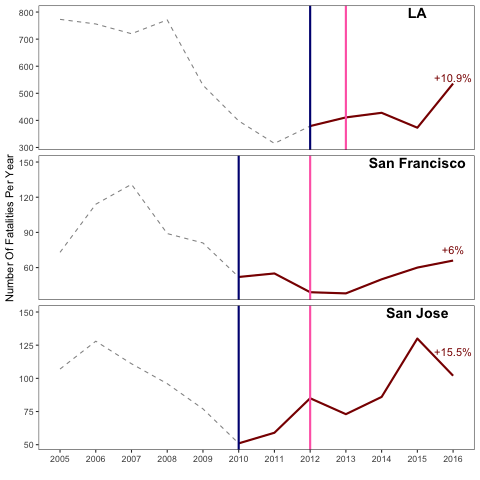

In [701]:
%%R
ggplot(data=summ,aes(x=year, y=casenum),color='grey') + geom_line(group=1,alpha=0.5,linetype = "dashed")+
facet_grid(city~.,scales="free")+
#theme(panel.background = element_blank())+
geom_line(data=summ_a,aes(x=year,y=casenum,group=1),color='darkred',size=1)+
geom_vline(data= data, aes(xintercept=lyft),color='hotpink',size=1)+
geom_vline(data= data, aes(xintercept=year),color='navyblue',size=1)+
theme_bw()+theme(strip.text.y = element_blank(),panel.grid.major = element_blank(), 
                 ,panel.grid.minor = element_blank(),legend.position="none")+
geom_text(data=text,mapping=aes(x = 11, y = y, label = city),fontface = "bold",size=5)+
geom_text(data=per_text,mapping=aes(x = 12, y = y, label = label),color='darkred')+
xlab('')+ylab('Number Of Fatalities Per Year')
#annotate(data=color,aes(x = x,xend=x+1,y = y,yend=ymax),color='darkred',size=1.5)
